# Objective
1. Handle Imbalance Data

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from collections import Counter
import joblib

from sklearn import preprocessing
from sklearn.metrics import  accuracy_score, f1_score, confusion_matrix, roc_auc_score

%matplotlib inline

# Data Acquisition

In [2]:
#define path of data folder
data_path = 'D:/JOB PREP/Practice and Projects/MobilePopularity/data/'
data = pd.read_csv(data_path+"train.csv")

In [3]:
#sample data
data.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [4]:
# Shape of dataset
data.shape

(1975, 10)

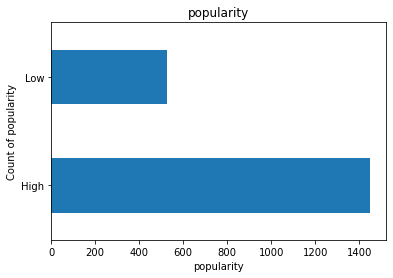

      counts         %
High    1450  0.734177
Low      525  0.265823


popularity    
dtype: object

In [5]:
def cat_analysis(x):
    count =x.value_counts()
    
    ax = count.head(8).plot(kind='barh', title=x.name)
    ax.set_xlabel(x.name)
    ax.set_ylabel("Count of "+str(x.name))
    plt.show()

    percent = x.value_counts( normalize=True)
    print(pd.concat([count,percent], axis=1, keys=['counts', '%']))
    
    return ''
    
data[['popularity']].apply(cat_analysis)

popularity is target variable which has two categories low and high. where 73.42% of apps belong to high category which makes data imbalance.

# Feature Handling
### Data Encoding

In [6]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data_encoded = data.apply(label_encoder.fit_transform)

data_encoded.shape

(1975, 10)

# Define independent and target features

In [7]:
x = data_encoded.iloc[:, :-1]
y = data_encoded.iloc[:, -1]

# 1. Random under-sampling with imblearn

In [9]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 1450, 1: 525})
Resample dataset shape Counter({0: 525, 1: 525})


# 2. Random over-sampling with imblearn

In [10]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 1450, 1: 525})
Resample dataset shape Counter({0: 1450, 1: 1450})


# 3. Under-sampling: Tomek links

In [11]:
# import library
from imblearn.under_sampling import TomekLinks

tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 1450, 1: 525})
Resample dataset shape Counter({0: 1450, 1: 1450})


# 4. Synthetic Minority Oversampling Technique (SMOTE)

In [12]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 1450, 1: 525})
Resample dataset shape Counter({0: 1450, 1: 1450})


# 5. NearMiss

In [13]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(x, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 1450, 1: 525})
Resample dataset shape: Counter({0: 525, 1: 525})


# Penalize Algorithms (Cost-Sensitive Training)

In [14]:
# split data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
# load library
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.6639082462253194
Accuracy score: 0.549367088607595
F1 score: 0.5265957446808511
